The objective of this notebook is to compare the networks' topologies to find common players and/or common interaction among the different subgroups of Medulloblastoma.

During the process of activity flow inference, genes in common with all the subgroups have been included. So those genes of course will pop out during the analysis...

In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd
from neko._methods.compare import compare_networks
from yfiles_jupyter_graphs import GraphWidget

In [2]:
data_folder = "../data/"

figures_folder = "../Figures/"

sif_output = "../sif_files/"

importing resources:

In [3]:
resources_signor = Resources()
resources_signor.import_signor_tsv(data_folder + "signor_db.tsv")

In [4]:
omnipath = op.interactions.OmniPath().get()

importing the Group3 networks inferred from signor and omnipath

In [7]:
sif_signor = sif_output + "Group3/group3_signor.sif"
Group3_signor = Network(sif_file=sif_signor, resources=resources_signor)

sif_omnipath = sif_output + "Group3/Group3_omnipath.sif"
Group3_omnipath = Network(sif_file=sif_omnipath, resources=omnipath)

# First we compare the nodes found in Signor and Omnipath

In [8]:
interaction_comparison, node_comparison = compare_networks(Group3_signor, Group3_omnipath)
print(interaction_comparison)
print(node_comparison)

    source       target           comparison
0     ABL1          ATR  Unique to Network 2
1     ABL1          BTK  Unique to Network 2
2     ABL1       CTNNB1  Unique to Network 2
3     ABL1         EGFR  Unique to Network 2
4     ABL1         ESR1  Unique to Network 2
..     ...          ...                  ...
570    YY1       NOTCH1  Unique to Network 1
571    YY1  SIGNOR-C130  Unique to Network 1
572   ZEB1         FBP1  Unique to Network 1
573   ZIC1         GLI1               Common
574   ZIC1         GLI3  Unique to Network 1

[575 rows x 3 columns]
            node           comparison
0     SIGNOR-C97  Unique to Network 1
1           SOX2  Unique to Network 1
2          SIRT1  Unique to Network 1
3            TBP  Unique to Network 1
4    CHEBI:29985  Unique to Network 1
..           ...                  ...
140       CDKN2A               Common
141         CDK1               Common
142         EZH2               Common
143        MYOD1               Common
144        KDM7A  

In [9]:
common_nodes = node_comparison[node_comparison["comparison"] == "Common"]["node"].values

In [10]:
common_nodes

array(['SP1', 'GTF2I', 'SMAD4', 'JAK2', 'CDKN1A', 'ATM', 'CTNNB1',
       'KDM1A', 'KDM3A', 'CASP3', 'KDM6A', 'MAPK3', 'KDM4C', 'TGFBR1',
       'SMAD9', 'SMARCA4', 'MYC', 'SMAD2', 'YY1', 'JUN', 'GLI1', 'CRX',
       'KDM5B', 'CDK2', 'TGFB1', 'ZIC1', 'CDC25A', 'CDKN2A', 'CDK1',
       'EZH2', 'MYOD1', 'KDM7A'], dtype=object)

In [11]:
signor_nodes = Group3_signor.nodes["Genesymbol"].values
len(signor_nodes)

107

In [12]:
omnipath_nodes = Group3_omnipath.nodes["Genesymbol"].values
len(omnipath_nodes)

70

In [13]:
NetworkVisualizer.vis_comparison(interaction_comparison, node_comparison,"hierarchic", True)

GraphWidget(layout=Layout(height='800px', width='100%'))

In [14]:
from venny4py.venny4py import *

In [15]:
set1 = set(omnipath_nodes.tolist())
set2 = set(signor_nodes.tolist())

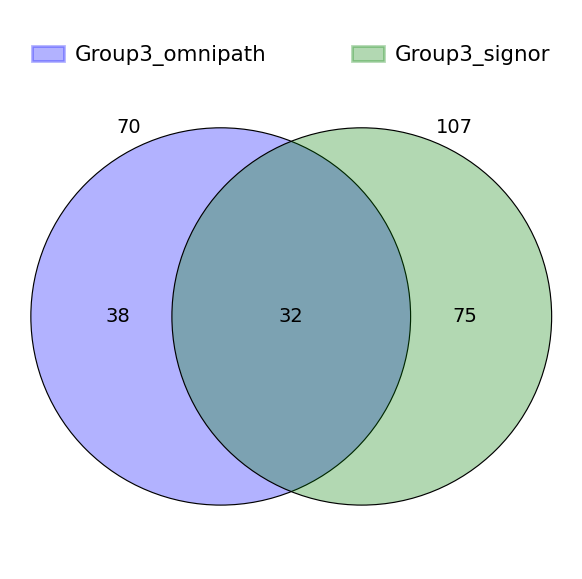

In [16]:
sets = {
    'Group3_omnipath': set(set1),
    'Group3_signor': set(set2),
}

venny4py(sets=sets, out='.', name="Group3_signor_omnipath")

# Comparison with full dataset 

### In this part I will compare the nodes retrieved by signor and omnipath with the genes differentially expressed in the Group3 group (see analysis Medulloblastoma part 3)

In [17]:
data_folder = "../data/"

In [18]:
data = pd.read_csv(data_folder + "gene_per_subgroup_correlation.csv", header=[0, 1])

In [19]:
data

Group         WNT                 SHH                  Group3  \
    Attribute        name correlation    name correlation        name   
0           0       AAED1    0.546154  A4GALT    0.676154       ABCB8   
1           1       ABCC8    0.722308   AAED1    0.546154       ABCG4   
2           2       ABCD2    0.750769    AASS    0.640769        ABT1   
3           3       ABHD4    0.527692   ABCB4    0.524615  AC016559.1   
4           4  AC007405.2    0.781538   ABCB9    0.717692  AC026703.1   
..        ...         ...         ...     ...         ...         ...   
855       855      ZNF503    0.502308     NaN         NaN         NaN   
856       856      ZNF576    0.486154     NaN         NaN         NaN   
857       857     ZNF804B    0.676154     NaN         NaN         NaN   
858       858       ZNRF2    0.739231     NaN         NaN         NaN   
859       859       ZNRF3    0.781538     NaN         NaN         NaN   

                  Group4              
    correlation     name correlation  
0      0.574615     AACS    0.740000  
1      0.739231    ABCC8    0.722308  
2      0.560769    ABCC9    0.779231  
3      0.736923  ABHD17C    0.583077  
4      0.889231    ABHD4    0.527692  
..          ...      ...         ...  
855         NaN   UBE2L6    0.775385  
856         NaN    UNC5D    0.938462  
857         NaN     UNCX    0.598462  
858         NaN    USP25    0.552308  
859         NaN    USP32    0.617692  

[860 rows x 9 columns]

In [20]:
set3 = data["SHH"]["name"].dropna().values

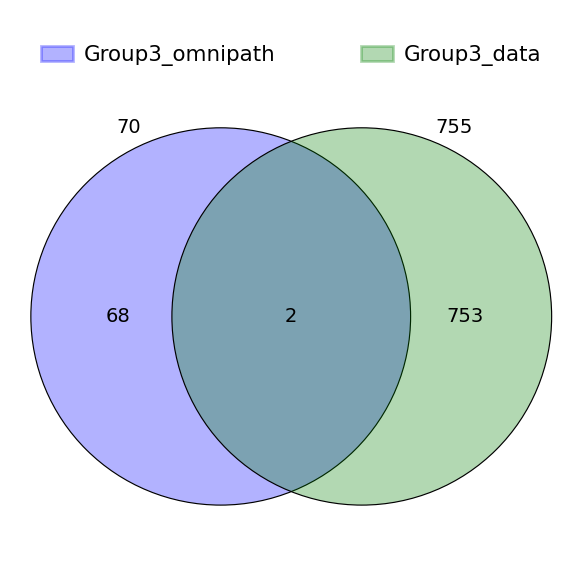

In [21]:
sets = {
    'Group3_omnipath': set(set1),
    'Group3_data': set(set3),
}

venny4py(sets=sets, out='.', name="Group3_data_omnipath")

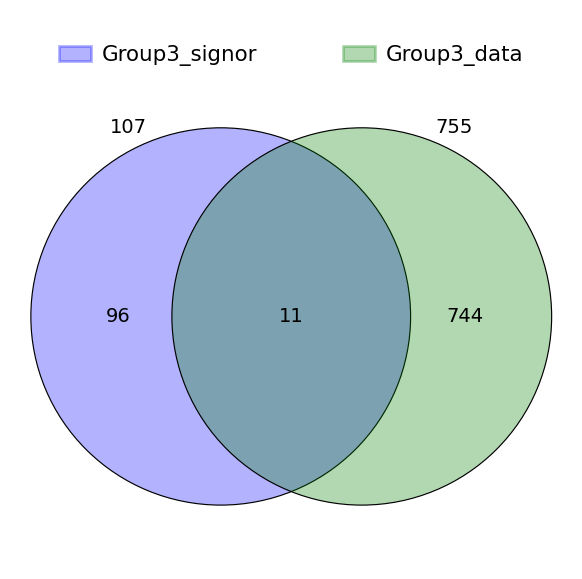

In [22]:
sets = {
    'Group3_signor': set(set2),
    'Group3_data': set(set3),
}

venny4py(sets=sets, out='.', name="Group3_data_signor")